# Bootstrap Confidence Intervals

In [0]:
import numpy as np
import pandas as pd

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data generation

### Telecommunication equipment repair time

Verizon is a major regional telecommunications company operating in the United States. The company is obliged to provide telecommunication equipment repair services not only for its customers but also for customers of other local telecommunications companies. Verizon may be fined.

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/datasets/week_10/verizon.txt', sep='\t')
data.shape

(1687, 2)

In [0]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [0]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

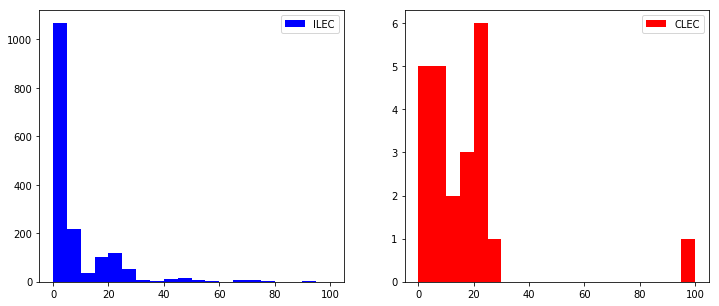

In [0]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [0]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [0]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Confidence interval for median

In [0]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [0]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

print ("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print ("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


### Difference between medians

In [0]:
print ("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


### Confidence interval for the median differnce

In [0]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))

In [0]:
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 2.04975 16.63   ]
